In [272]:
import numpy as np
import matplotlib.pyplot as plt

In [273]:
def matrixFromFile(fileName):
    with open(fileName,'r') as file:
        content = file.readlines()
    
    params = content[0].split()
    rows = int(params[0])
    cols = int(params[1])
    n = int(params[2])

    A = np.zeros((rows,cols))

    content.pop(0)
    for elemento in content:
        params = elemento.split()
        i = int(params[0])
        j = int(params[1])
        val = float(params[2])

        A[i,j] = val

    return A

def vectorFromFile(fileName):
    with open(fileName,'r') as file:
        content = file.readlines()
    n = int(content[0])
    f = []
    for i in range(n):
        f.append(float(content[i+1]))
    return np.array(f)


def formatSol(n,u):
    out = []
    temp = []

    for i in range(n):
        for j in range(n):
            temp.append(u[i*n+j])
        out.append(temp)
        temp = []

    return np.matrix(out)

In [274]:
finestGridN = 50
levels = 2
N = finestGridN
for i in range(1,levels+1):
    N = N * 2 - 1
print(N)

197


In [275]:
alpha = 1.
!./prova {N} {alpha}
#N = finestGridN

Achieved residual on coarse grid: 0.0991407
Achieved residual on coarse grid: 0.0996878
Achieved residual on coarse grid: 0.0989458
Achieved residual on coarse grid: 0.0998775
Achieved residual on coarse grid: 0.0997144
Achieved residual on coarse grid: 0.0998758
Achieved residual on coarse grid: 0.0999029
Achieved residual on coarse grid: 0.0999095
Achieved residual on coarse grid: 0.0999097
Achieved residual on coarse grid: 0.0999098
Achieved residual on coarse grid: 0.0999099
Achieved residual on coarse grid: 0.0999095
Achieved residual on coarse grid: 0.0999045
Achieved residual on coarse grid: 0.0996591
Achieved residual on coarse grid: 0.0999556
Achieved residual on coarse grid: 0.0997155
Achieved residual on coarse grid: 0.0980476
Achieved residual on coarse grid: 0.0987628
Achieved residual on coarse grid: 0.0992707
Achieved residual on coarse grid: 0.0999789


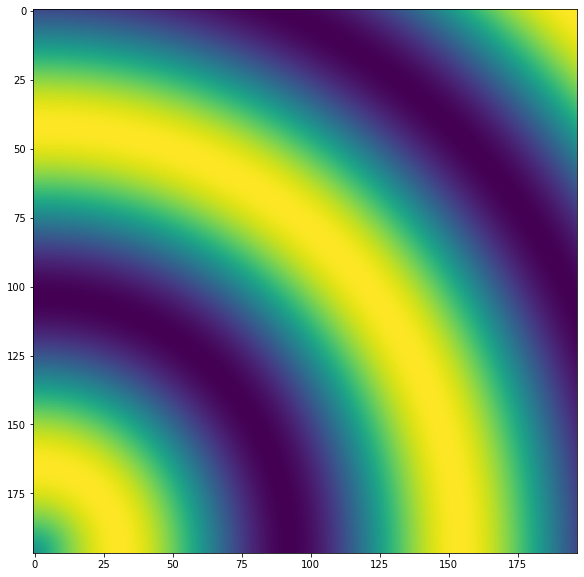

In [276]:
plt.rcParams['figure.figsize'] = [10,10]
colorMap = 'viridis'
u = vectorFromFile('x.mtx')
sol = formatSol(N,u)
plt.imshow(sol,cmap=colorMap)
plt.show()

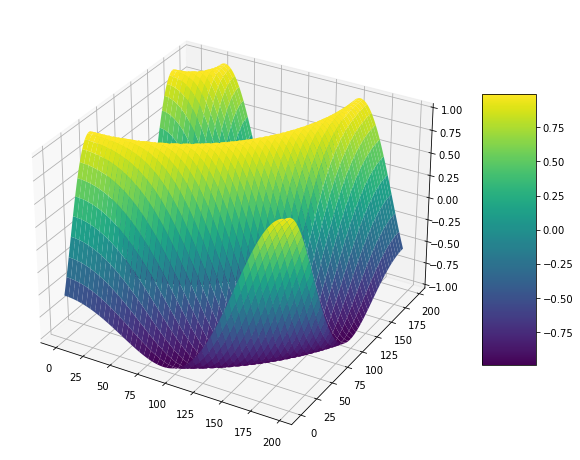

In [277]:
X = np.arange(0,N)
Y = np.arange(0,N)

X,Y = np.meshgrid(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X,Y,sol,cmap = colorMap)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [278]:
'''
matrici = ['A_h.mtx','A_2h.mtx','A_4h.mtx']

for matrice in matrici:
    mat = matrixFromFile(matrice)
    plt.imshow(mat)
    plt.show()
'''

"\nmatrici = ['A_h.mtx','A_2h.mtx','A_4h.mtx']\n\nfor matrice in matrici:\n    mat = matrixFromFile(matrice)\n    plt.imshow(mat)\n    plt.show()\n"

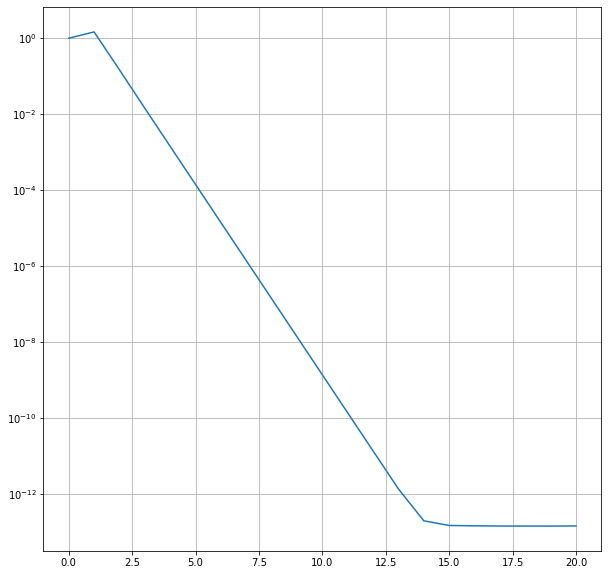

In [279]:
#solvers = ['MGGS.txt','MGJ.txt']
solvers = ['MGGS.txt']
for solver in solvers:
    error = vectorFromFile(solver)
    x = np.arange(0,len(error))
    plt.semilogy(x,error)
plt.grid()
plt.show()